In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import numpy as np
import seaborn as sns
import yfinance as yf
from pathlib import Path
from MCForecastTools import MCSimulation
%matplotlib inline

In [2]:
# Load .env environment variables
load_dotenv()

True

In [3]:
###Set Alpaca API key and secret
alpaca_api_key = os.getenv("api_key_id")
alpaca_secret_key = os.getenv("secret_api_key")
###Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [4]:
 # Verify that Alpaca key and secret were correctly loaded
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [5]:
###Format current date as ISO format
today = pd.Timestamp("2020-10-09", tz="America/New_York").isoformat()
###Set the tickers
tickers = ["AAPL", "GOOGL", "BRK.B", "JNJ"]
###Set timeframe to '1D' for Alpaca API
timeframe = "1D"
###Get current closing prices for SPY and AGG
stocks_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

###Preview DataFrame
stocks_portfolio

AAPL                                  BRK.B  \
                             open high     low   close    volume    open   
2020-10-09 00:00:00-04:00  115.28  117  114.92  116.98  86041259  215.88   

                                                                GOOGL  \
                               high     low   close   volume     open   
2020-10-09 00:00:00-04:00  216.2924  214.16  215.62  4903157  1492.86   

                                                               JNJ          \
                              high   low    close   volume    open    high   
2020-10-09 00:00:00-04:00  1511.85  1487  1510.45  1368884  149.67  151.48   

                                                     
                               low   close   volume  
2020-10-09 00:00:00-04:00  149.445  150.93  7666967

In [6]:
# Format start and end dates as ISO format for 5 year period
start = pd.Timestamp("2015-01-01", tz="America/New_York").isoformat()
end = pd.Timestamp("2020-08-01", tz="America/New_York").isoformat()

In [7]:
# Get closing prices
df_portfolio_year = alpaca.get_barset(
    tickers,
    timeframe,
    start = start,
    end = end
).df
# Drop the time component of the date
df_portfolio_year.index = df_portfolio_year.index.date
# Display sample data
df_portfolio_year.head(5)

AAPL                                      BRK.B            \
              open    high      low   close    volume    open      high   
2015-01-02  111.39  111.44  107.350  109.30  47045497  151.50  151.6000   
2015-01-05  108.29  108.65  105.410  106.25  50146623  148.81  149.0000   
2015-01-06  106.56  107.43  104.630  106.23  59441540  147.64  148.5300   
2015-01-07  107.20  108.20  106.695  107.75  34452408  147.94  149.1399   
2015-01-08  109.23  112.15  108.700  111.87  50255019  150.60  151.3300   

                                         GOOGL                            \
                low   close     volume    open      high     low   close   
2015-01-02  148.500  149.13  2463511.0  532.60  535.8000  527.88  529.55   
2015-01-05  146.780  147.07  3261548.0  527.01  527.9899  517.75  519.24   
2015-01-06  146.111  146.70  3297957.0  520.50  521.2100  505.55  506.89   
2015-01-07  147.650  148.81  2696224.0  510.95  511.4900  503.65  505.15   
2015-01-08  150.510  151.25  3442794.0  501.51  507.5000  495.02  506.85   

                        JNJ                                    
             volume    open    high      low   close   volume  
2015-01-02   829538  105.05  105.55  104.130  104.49  4238082  
2015-01-05  1300076  104.48  104.73  103.682  103.85  6135505  
2015-01-06  1878228  104.34  104.99  102.940  103.25  6174712  
2015-01-07  1683477  103.91  105.83  103.810  105.56  6744677  
2015-01-08  2500177  106.06  106.49  105.750  106.38  7432752

In [8]:
# Create an empty DataFrame for closing prices
df_closing_prices = pd.DataFrame()

# Fetch the closing prices of stocks
df_closing_prices["AAPL"] = df_portfolio_year["AAPL"]["close"]
df_closing_prices["GOOGL"] = df_portfolio_year["GOOGL"]["close"]
df_closing_prices["BRK.B"] = df_portfolio_year["BRK.B"]["close"]
df_closing_prices["JNJ"] = df_portfolio_year["JNJ"]["close"]

# Display sample data
df_closing_prices.head(10)

,AAPL,GOOGL,BRK.B,JNJ
2015-01-02,109.30,529.55,149.13,104.49
2015-01-05,106.25,519.24,147.07,103.85
2015-01-06,106.23,506.89,146.70,103.25
2015-01-07,107.75,505.15,148.81,105.56
2015-01-08,111.87,506.85,151.25,106.38
2015-01-09,112.00,500.66,149.53,104.96
2015-01-12,109.24,497.07,148.33,104.60
2015-01-13,110.22,501.76,148.54,104.74
2015-01-14,109.79,505.80,147.77,103.98
2015-01-15,106.83,504.09,147.60,102.54


In [9]:
#Calculate daily return
df_daily_return = df_closing_prices.pct_change()
df_daily_return = df_daily_return.dropna()
df_daily_return.head()

,AAPL,GOOGL,BRK.B,JNJ
2015-01-05,-0.027905,-0.019469,-0.013813,-0.006125
2015-01-06,-0.000188,-0.023785,-0.002516,-0.005778
2015-01-07,0.014309,-0.003433,0.014383,0.022373
2015-01-08,0.038237,0.003365,0.016397,0.007768
2015-01-09,0.001162,-0.012213,-0.011372,-0.013348


In [10]:
#checking dtype
df_daily_return.dtypes

AAPL     float64
GOOGL    float64
BRK.B    float64
JNJ      float64
dtype: object

In [11]:
#Calculate Daily standard deviation and sort values
portfolio_std = df_daily_return.std().sort_values()
portfolio_std

JNJ      0.012245
BRK.B    0.013185
GOOGL    0.016796
AAPL     0.018239
dtype: float64

In [12]:
###Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
#Set weights
##Calculate portfolio return
###Display sample data
weights = [0.25, 0.25, 0.25, 0.25]

portfolios_returns = df_daily_return.dot(weights)
portfolios_returns.head()

2015-01-05   -0.016828
2015-01-06   -0.008067
2015-01-07    0.011908
2015-01-08    0.016442
2015-01-09   -0.008943
dtype: float64

In [13]:
#ADD TESLA stock in the portfolio
# Get historical data of TESLA stock
tesla_portfolio_year = alpaca.get_barset(
    "TSLA",
    timeframe,
    start = start,
    end = end
).df
# Drop the time component of the date
tesla_portfolio_year.index = tesla_portfolio_year.index.date
# Create an empty DataFrame for tesla closing prices
tesla_closing_prices = pd.DataFrame()
# Fetch the closing prices of tesla
tesla_closing_prices["TSLA"] = tesla_portfolio_year["TSLA"]["close"]
# Calculate daily return of closing prices of tesla
tesla_daily_return=tesla_closing_prices.pct_change().dropna()

In [14]:
#CONCAT TESLA STOCK WITH THE PORTFOLIO
wtesla_daily_return = pd.concat([df_daily_return, tesla_daily_return], axis="columns", join="inner")
wtesla_daily_return.head()

,AAPL,GOOGL,BRK.B,JNJ,TSLA
2015-01-05,-0.027905,-0.019469,-0.013813,-0.006125,-0.041881
2015-01-06,-0.000188,-0.023785,-0.002516,-0.005778,0.005619
2015-01-07,0.014309,-0.003433,0.014383,0.022373,-0.001799
2015-01-08,0.038237,0.003365,0.016397,0.007768,-0.001233
2015-01-09,0.001162,-0.012213,-0.011372,-0.013348,-0.018760


In [15]:
###Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
#Set weights
##Calculate portfolio return
###Display sample data
weights = [0.2, 0.2, 0.2, 0.2, 0.2]

wtesla_portfolios_returns = wtesla_daily_return.dot(weights)
wtesla_portfolios_returns.head()

2015-01-05   -0.021839
2015-01-06   -0.005330
2015-01-07    0.009167
2015-01-08    0.012907
2015-01-09   -0.010906
dtype: float64

In [16]:
# Open S&P 500 historical prices
file_path = Path("Resources\S&P500_5years.csv")
sp500 = pd.read_csv(file_path, parse_dates=True, index_col="Date", infer_datetime_format=True)
sp500.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-11-04,2110.600098,2114.590088,2096.979980,2102.310059,2102.310059,4078870000
2015-11-05,2101.679932,2108.780029,2090.409912,2099.929932,2099.929932,4051890000
2015-11-06,2098.600098,2101.909912,2083.739990,2099.199951,2099.199951,4369020000
2015-11-09,2096.560059,2096.560059,2068.239990,2078.580078,2078.580078,3882350000
2015-11-10,2077.189941,2083.669922,2069.909912,2081.719971,2081.719971,3821440000


In [17]:
# Fetch the closing prices of S&P500
sp500_closing_prices = pd.DataFrame()
sp500_closing_prices["S&P500"] = sp500["Close"]
sp500_closing_prices_daily = sp500_closing_prices.pct_change().dropna().copy()

In [18]:
#Concatenate STOCKS & INDEX
all_portfolio = pd.concat([portfolios_returns, wtesla_portfolios_returns, sp500_closing_prices_daily], axis="columns", join="inner")
all_portfolio_concat = all_portfolio.rename(columns= {0 : "wo_Tesla", 1 : "w_Tesla"})
all_portfolio_concat.tail()

,wo_Tesla,w_Tesla,S&P500
2020-07-27,0.004614,0.021260,0.007395
2020-07-28,-0.005934,-0.013132,-0.006473
2020-07-29,0.010235,0.011528,0.012428
2020-07-30,0.003377,0.001026,-0.003750
2020-07-31,0.018317,0.007201,0.007671


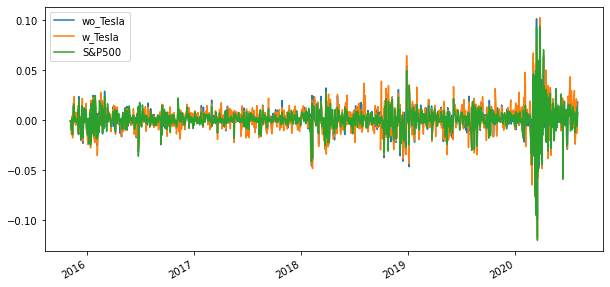

In [19]:
all_portfolio_concat.plot(figsize=(10,5))

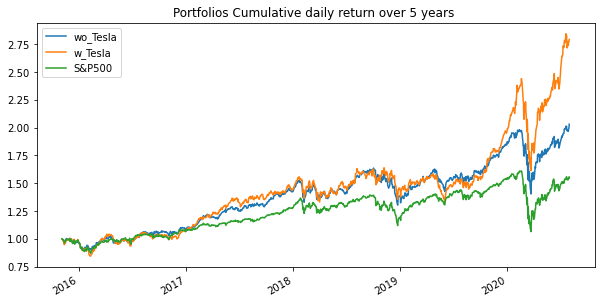

In [20]:
# Calculate the cumulative returns using the 'cumprod()' function
df_cumulative = (1 + all_portfolio_concat).cumprod()
df_cumulative.plot(figsize=(10, 5), title="Portfolios Cumulative daily return over 5 years ").get_figure().savefig('Cumulative_portfolios.png')

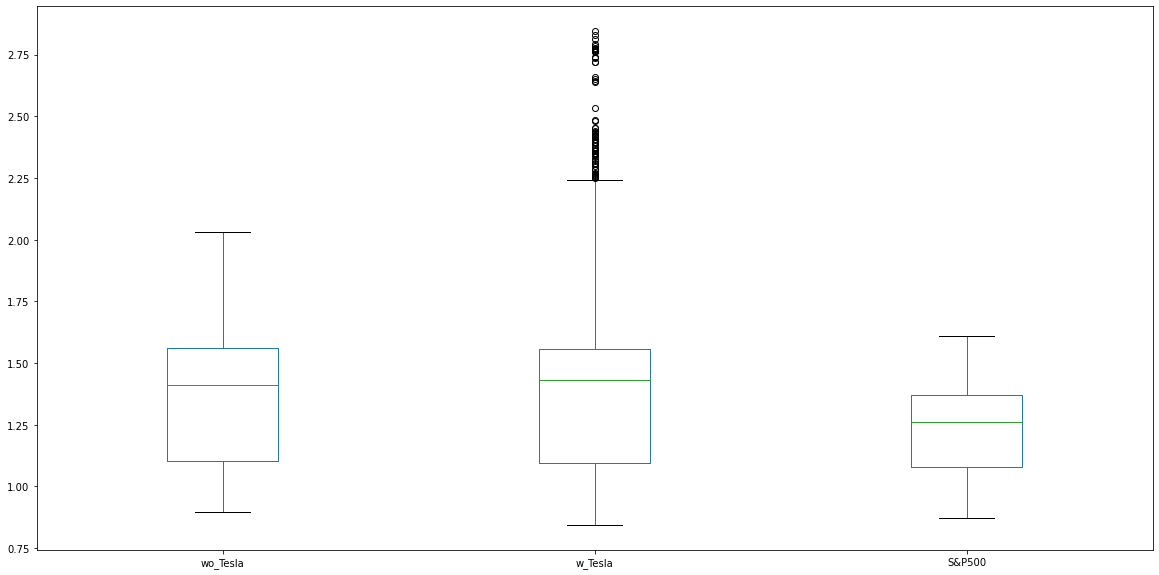

In [21]:
# Plot the cumulative returns using plot.box
df_cumulative.plot.box(figsize=(20,10))

In [22]:
#Calculate Daily standard deviation and sort values
portfolio_std = all_portfolio_concat.std().sort_values()
portfolio_std

S&P500      0.012160
wo_Tesla    0.012480
w_Tesla     0.014173
dtype: float64

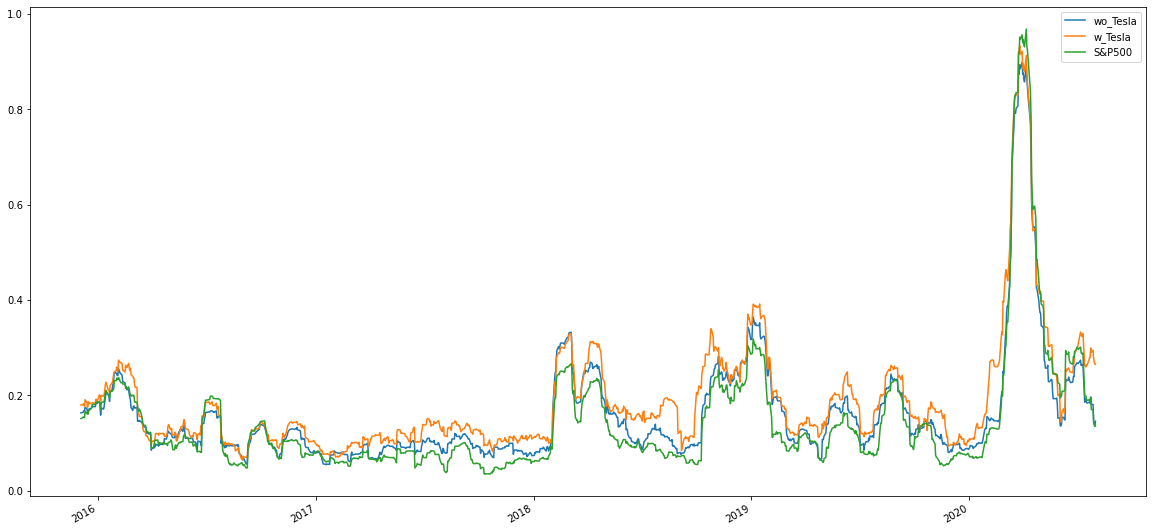

In [23]:
# Plot a rolling 21-day mean of stocks closing prices
annualized_std = all_portfolio_concat * np.sqrt(252)
annualized_std.rolling(window=21).std().plot(figsize=(20,10))

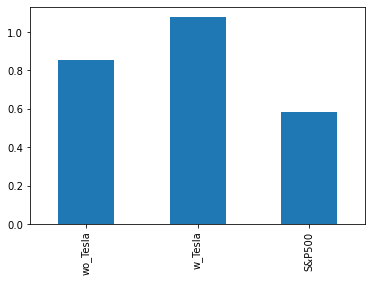

In [24]:
#Plot Annualized Sharpe Ratios
sharpe_ratios = (all_portfolio_concat.mean() * 252) / (all_portfolio_concat.std() * np.sqrt(252))
sharpe_ratios.plot(kind="bar")

In [25]:
# Set number of simulations
num_sims = 500

# Configure a Monte Carlo simulation to forecast 5 years daily returns
MC_wo_tesla_5y = MCSimulation(
    portfolio_data = df_portfolio_year,
    weights = [0.25, 0.25, 0.25, 0.25],
    num_simulation = num_sims,
    num_trading_days = 252*5
)
MC_wo_tesla_5y.portfolio_data.head()

AAPL                                                   BRK.B  \
              open    high      low   close    volume daily_return    open   
2015-01-02  111.39  111.44  107.350  109.30  47045497          NaN  151.50   
2015-01-05  108.29  108.65  105.410  106.25  50146623    -0.027905  148.81   
2015-01-06  106.56  107.43  104.630  106.23  59441540    -0.000188  147.64   
2015-01-07  107.20  108.20  106.695  107.75  34452408     0.014309  147.94   
2015-01-08  109.23  112.15  108.700  111.87  50255019     0.038237  150.60   

                                       ...   GOOGL                   \
                high      low   close  ...     low   close   volume   
2015-01-02  151.6000  148.500  149.13  ...  527.88  529.55   829538   
2015-01-05  149.0000  146.780  147.07  ...  517.75  519.24  1300076   
2015-01-06  148.5300  146.111  146.70  ...  505.55  506.89  1878228   
2015-01-07  149.1399  147.650  148.81  ...  503.65  505.15  1683477   
2015-01-08  151.3300  150.510  151.25  ...  495.02  506.85  2500177   

                            JNJ                                                 
           daily_return    open    high      low   close   volume daily_return  
2015-01-02          NaN  105.05  105.55  104.130  104.49  4238082          NaN  
2015-01-05    -0.019469  104.48  104.73  103.682  103.85  6135505    -0.006125  
2015-01-06    -0.023785  104.34  104.99  102.940  103.25  6174712    -0.005778  
2015-01-07    -0.003433  103.91  105.83  103.810  105.56  6744677     0.022373  
2015-01-08     0.003365  106.06  106.49  105.750  106.38  7432752     0.007768  

[5 rows x 24 columns]

In [26]:
MC_wo_tesla_5y.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995518,1.005982,0.982903,0.996590,0.995514,0.998653,1.006116,0.999296,0.984347,1.005857,...,1.006210,0.997714,1.009136,0.993187,1.012742,0.992971,0.996798,0.996905,1.014528,1.007644
2,1.004216,1.000920,0.974367,0.997264,0.995904,0.997982,1.016489,1.001159,0.988030,1.002369,...,0.996821,0.982075,1.012148,0.995831,1.001668,0.994556,0.981644,1.002756,1.011066,1.004365
3,1.004640,1.004195,0.978568,1.001834,1.000645,1.000210,1.010571,1.016094,0.984303,0.998674,...,1.008702,0.987549,1.011728,0.989299,1.006663,0.985685,0.981008,1.007659,1.022422,1.007083
4,1.006810,1.018947,0.990611,1.014675,1.004816,1.000618,1.011974,1.022955,0.965400,0.999480,...,1.018395,0.983197,1.012049,0.982364,1.011120,0.989839,0.974508,1.008200,1.025899,1.007472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.431437,2.392540,1.719501,3.263765,1.488874,1.280129,1.730014,3.330058,2.607683,2.949213,...,2.204851,1.429434,2.209570,1.559346,2.234345,2.298062,2.201248,1.852622,1.805004,2.566206
1257,1.432731,2.375815,1.739280,3.256528,1.485312,1.313482,1.713508,3.364530,2.631919,2.920581,...,2.223579,1.409182,2.217894,1.564158,2.219852,2.327397,2.184210,1.865010,1.801567,2.547921
1258,1.438731,2.363703,1.752687,3.285468,1.485467,1.324229,1.717804,3.316455,2.638339,2.942619,...,2.237130,1.412472,2.233871,1.540508,2.226754,2.316814,2.210261,1.858646,1.804360,2.555624
1259,1.448645,2.351931,1.741733,3.300900,1.489389,1.328738,1.711298,3.298669,2.618549,2.921638,...,2.252481,1.402594,2.232817,1.542230,2.242032,2.309460,2.200230,1.863342,1.788953,2.540253


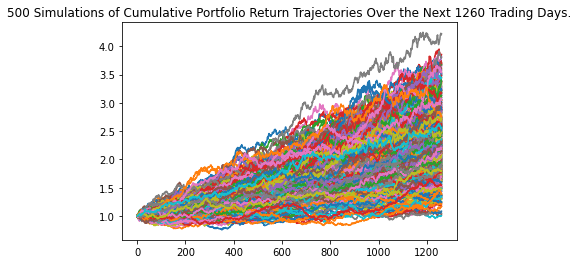

In [27]:
 # Plot simulation outcomes
line_plot_wo5y = MC_wo_tesla_5y.plot_simulation()

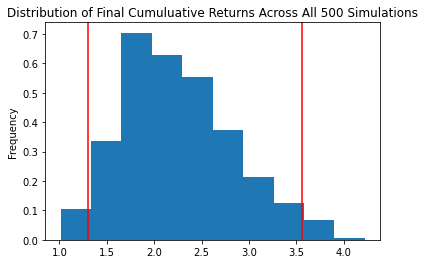

In [28]:
dist_plot_wo5y = MC_wo_tesla_5y.plot_distribution()

In [29]:
# Fetch summary statistics from the Monte Carlo simulation results
stocks_tbl_wo5y = MC_wo_tesla_5y.summarize_cumulative_return() 

# Print summary statistics
print(stocks_tbl_wo5y)

count           500.000000
mean              2.253643
std               0.591372
min               1.011384
25%               1.811455
50%               2.187469
75%               2.617957
max               4.222799
95% CI Lower      1.298606
95% CI Upper      3.557526
Name: 1260, dtype: float64


In [30]:
# Set initial investment
initial_investment = 10000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible 
#outcomes of our $10,000
ci_lower_wo5y = round(stocks_tbl_wo5y[8]*initial_investment,2)
ci_upper_wo5y = round(stocks_tbl_wo5y[9]*initial_investment,2)

# Print results
print(f"With an initial investment of ${initial_investment} in your portfolio you have a 95% " 
      f"chance it will be within in the range of ${ci_lower_wo5y} and ${ci_upper_wo5y} over the next 5 years")

With an initial investment of $10000 in your portfolio you have a 95% chance it will be within in the range of $12986.06 and $35575.26 over the next 5 years


In [31]:
# Configure a Monte Carlo simulation to forecast 10 years daily returns
MC_wo_tesla_10y = MCSimulation(
    portfolio_data = df_portfolio_year,
    weights = [0.25, 0.25, 0.25, 0.25],
    num_simulation = num_sims,
    num_trading_days = 252*10
)
MC_wo_tesla_10y.portfolio_data.head()

AAPL                                                   BRK.B  \
              open    high      low   close    volume daily_return    open   
2015-01-02  111.39  111.44  107.350  109.30  47045497          NaN  151.50   
2015-01-05  108.29  108.65  105.410  106.25  50146623    -0.027905  148.81   
2015-01-06  106.56  107.43  104.630  106.23  59441540    -0.000188  147.64   
2015-01-07  107.20  108.20  106.695  107.75  34452408     0.014309  147.94   
2015-01-08  109.23  112.15  108.700  111.87  50255019     0.038237  150.60   

                                       ...   GOOGL                   \
                high      low   close  ...     low   close   volume   
2015-01-02  151.6000  148.500  149.13  ...  527.88  529.55   829538   
2015-01-05  149.0000  146.780  147.07  ...  517.75  519.24  1300076   
2015-01-06  148.5300  146.111  146.70  ...  505.55  506.89  1878228   
2015-01-07  149.1399  147.650  148.81  ...  503.65  505.15  1683477   
2015-01-08  151.3300  150.510  151.25  ...  495.02  506.85  2500177   

                            JNJ                                                 
           daily_return    open    high      low   close   volume daily_return  
2015-01-02          NaN  105.05  105.55  104.130  104.49  4238082          NaN  
2015-01-05    -0.019469  104.48  104.73  103.682  103.85  6135505    -0.006125  
2015-01-06    -0.023785  104.34  104.99  102.940  103.25  6174712    -0.005778  
2015-01-07    -0.003433  103.91  105.83  103.810  105.56  6744677     0.022373  
2015-01-08     0.003365  106.06  106.49  105.750  106.38  7432752     0.007768  

[5 rows x 24 columns]

In [32]:
MC_wo_tesla_10y.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.993220,1.010276,0.990212,0.988477,0.999444,0.998666,1.002677,1.007342,1.020604,1.011865,...,0.998652,0.994681,0.994191,0.995066,0.998532,1.003351,1.006810,0.988773,0.997994,1.013291
2,0.988519,1.022874,0.977681,1.004781,1.013745,0.990171,1.006305,1.002651,1.014361,0.994635,...,0.987014,0.987530,0.995465,0.994234,1.007857,1.006263,1.003116,0.998700,1.003403,1.005951
3,0.997758,1.037710,0.975293,1.005873,1.008237,0.996602,1.004717,0.998150,1.013812,0.992329,...,0.991353,0.998848,0.997896,1.008319,1.007552,1.021030,1.012536,0.988119,0.995746,1.007905
4,1.000965,1.040193,0.962348,1.004697,1.009204,1.008600,1.007452,1.001973,1.019156,0.996052,...,0.994106,1.011482,0.993845,1.019982,1.001000,1.013902,1.019918,0.984756,1.003469,1.005055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,6.806614,10.618364,7.684789,8.054031,11.907099,4.754822,6.029901,3.755626,4.959342,4.829997,...,2.978797,5.946150,3.658976,5.305069,3.385554,2.478496,4.112970,3.671403,5.802696,4.844429
2517,6.780029,10.785089,7.641692,8.045449,11.875665,4.794502,6.092711,3.787633,4.945882,4.855100,...,2.984853,5.956267,3.681584,5.274264,3.396742,2.474629,4.122452,3.686712,5.809843,4.869368
2518,6.783951,10.716410,7.744800,7.997729,11.788107,4.827727,6.090304,3.797271,4.996881,4.896053,...,2.983178,5.954943,3.647720,5.226873,3.383871,2.473005,4.106412,3.666420,5.812816,4.848178
2519,6.767884,10.720745,7.776222,8.018763,11.873984,4.791460,6.166179,3.784648,5.012041,4.836245,...,2.986912,6.037911,3.658735,5.183200,3.367806,2.487144,4.093049,3.652660,5.851476,4.820260


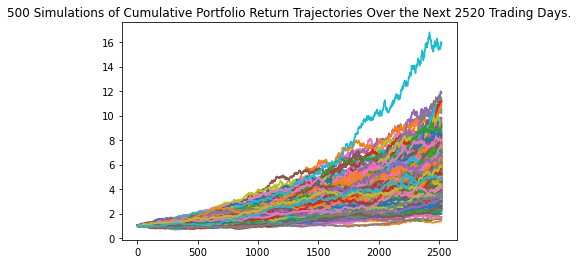

In [33]:
 # Plot simulation outcomes
line_plot_wo10y = MC_wo_tesla_10y.plot_simulation()

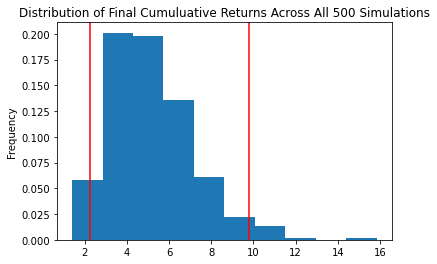

In [34]:
dist_plot_wo10y = MC_wo_tesla_10y.plot_distribution()

In [35]:
# Fetch summary statistics from the Monte Carlo simulation results
stocks_tbl_wo10y = MC_wo_tesla_10y.summarize_cumulative_return() 

# Print summary statistics
print(stocks_tbl_wo10y)

count           500.000000
mean              5.161868
std               1.987717
min               1.413625
25%               3.683111
50%               4.809125
75%               6.273110
max              15.836218
95% CI Lower      2.258698
95% CI Upper      9.794423
Name: 2520, dtype: float64


In [36]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible 
#outcomes of our $10,000
ci_lower_wo10y = round(stocks_tbl_wo10y[8]*initial_investment,2)
ci_upper_wo10y = round(stocks_tbl_wo10y[9]*initial_investment,2)

# Print results
print(f"With an initial investment of ${initial_investment} in your portfolio you have a 95% " 
      f"chance it will be within in the range of ${ci_lower_wo10y} and ${ci_upper_wo10y} over the next 10 years")

With an initial investment of $10000 in your portfolio you have a 95% chance it will be within in the range of $22586.98 and $97944.23 over the next 10 years


In [37]:
# Configure a Monte Carlo simulation to forecast 20 years daily returns
MC_wo_tesla_20y = MCSimulation(
    portfolio_data = df_portfolio_year,
    weights = [0.25, 0.25, 0.25, 0.25],
    num_simulation = num_sims,
    num_trading_days = 252*20
)
MC_wo_tesla_20y.portfolio_data.head()

AAPL                                                   BRK.B  \
              open    high      low   close    volume daily_return    open   
2015-01-02  111.39  111.44  107.350  109.30  47045497          NaN  151.50   
2015-01-05  108.29  108.65  105.410  106.25  50146623    -0.027905  148.81   
2015-01-06  106.56  107.43  104.630  106.23  59441540    -0.000188  147.64   
2015-01-07  107.20  108.20  106.695  107.75  34452408     0.014309  147.94   
2015-01-08  109.23  112.15  108.700  111.87  50255019     0.038237  150.60   

                                       ...   GOOGL                   \
                high      low   close  ...     low   close   volume   
2015-01-02  151.6000  148.500  149.13  ...  527.88  529.55   829538   
2015-01-05  149.0000  146.780  147.07  ...  517.75  519.24  1300076   
2015-01-06  148.5300  146.111  146.70  ...  505.55  506.89  1878228   
2015-01-07  149.1399  147.650  148.81  ...  503.65  505.15  1683477   
2015-01-08  151.3300  150.510  151.25  ...  495.02  506.85  2500177   

                            JNJ                                                 
           daily_return    open    high      low   close   volume daily_return  
2015-01-02          NaN  105.05  105.55  104.130  104.49  4238082          NaN  
2015-01-05    -0.019469  104.48  104.73  103.682  103.85  6135505    -0.006125  
2015-01-06    -0.023785  104.34  104.99  102.940  103.25  6174712    -0.005778  
2015-01-07    -0.003433  103.91  105.83  103.810  105.56  6744677     0.022373  
2015-01-08     0.003365  106.06  106.49  105.750  106.38  7432752     0.007768  

[5 rows x 24 columns]

In [38]:
MC_wo_tesla_20y.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005341,1.009229,1.001758,0.994974,0.993564,1.008915,0.996134,1.000660,0.992706,1.017181,...,1.003749,0.991141,0.996973,1.010696,1.005637,1.002293,1.023483,0.998635,0.998217,1.006330
2,1.007175,1.007689,1.002347,0.984758,1.003112,1.002953,0.992921,0.991769,1.002565,1.006416,...,1.015421,0.988936,0.993745,1.007391,0.996925,1.010383,1.020029,1.005483,0.990870,1.004250
3,1.006813,1.014093,1.008848,0.975038,1.016652,0.986579,0.997129,0.980096,1.010309,0.999268,...,1.006466,0.981990,0.994814,0.998916,0.989721,1.013299,1.014095,1.011624,0.999423,1.015841
4,1.006406,1.029874,1.016263,0.971261,1.018345,0.983523,0.997580,0.984839,1.003973,0.995751,...,0.998703,0.990212,0.995062,1.010390,0.986193,1.005452,1.019286,1.012184,0.997004,1.012284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5036,49.946927,48.231210,27.809973,40.765817,53.153526,24.815499,13.136347,9.738453,40.928264,39.178046,...,27.277794,21.054696,33.436807,38.627276,8.207098,27.858075,24.663973,19.088316,16.005288,46.509595
5037,49.276283,48.043636,28.267850,40.565812,53.374314,24.731253,13.286481,9.732495,40.593772,39.196640,...,27.091733,21.139438,32.995705,38.123865,8.187199,28.311983,24.614075,19.307262,16.166861,46.564250
5038,48.779944,48.674234,28.329745,40.472490,53.549462,24.572736,13.426502,9.708678,40.555335,39.469115,...,26.936891,21.038487,33.316301,37.822730,8.175969,28.524201,24.614241,19.113946,16.236604,47.040859
5039,48.725231,48.321926,28.011153,40.247513,53.114238,24.635110,13.458526,9.820566,40.342582,39.842793,...,27.212238,20.889180,33.666335,37.638008,8.183992,28.641235,24.608707,19.236483,16.256819,47.089586


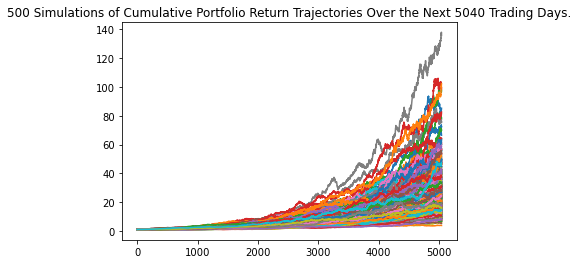

In [39]:
 # Plot simulation outcomes
line_plot_wo20y = MC_wo_tesla_20y.plot_simulation()

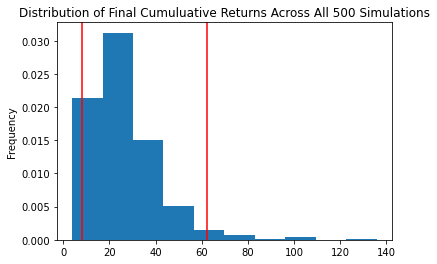

In [40]:
dist_plot_wo20y = MC_wo_tesla_20y.plot_distribution().get_figure().savefig('MCS_wo_TESLA_20y.png')

In [41]:
# Fetch summary statistics from the Monte Carlo simulation results
stocks_tbl_wo20y = MC_wo_tesla_20y.summarize_cumulative_return() 

# Print summary statistics
print(stocks_tbl_wo20y)

count           500.000000
mean             26.367013
std              15.344308
min               3.836955
25%              16.082731
50%              22.671865
75%              32.232240
max             135.808473
95% CI Lower      7.965768
95% CI Upper     62.419977
Name: 5040, dtype: float64


In [42]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible 
#outcomes of our $10,000
ci_lower_wo20y = round(stocks_tbl_wo20y[8]*initial_investment,2)
ci_upper_wo20y = round(stocks_tbl_wo20y[9]*initial_investment,2)

# Print results
print(f"With an initial investment of ${initial_investment} in your portfolio you have a 95% " 
      f"chance it will be within in the range of ${ci_lower_wo20y} and ${ci_upper_wo20y} over the next 20 years")

With an initial investment of $10000 in your portfolio you have a 95% chance it will be within in the range of $79657.68 and $624199.77 over the next 20 years


In [43]:
wtesla_portfolio = pd.concat([df_portfolio_year, tesla_portfolio_year], axis="columns", join="inner")

# Configure a Monte Carlo simulation to forecast 5 years daily returns with TESLA stock
MC_w_tesla_5y = MCSimulation(
    portfolio_data = wtesla_portfolio,
    weights = [0.2, 0.2, 0.2, 0.2, 0.2],
    num_simulation = num_sims,
    num_trading_days = 252*5
)
MC_w_tesla_5y.portfolio_data.head()

AAPL                                                   BRK.B  \
              open    high      low   close    volume daily_return    open   
2015-01-02  111.39  111.44  107.350  109.30  47045497          NaN  151.50   
2015-01-05  108.29  108.65  105.410  106.25  50146623    -0.027905  148.81   
2015-01-06  106.56  107.43  104.630  106.23  59441540    -0.000188  147.64   
2015-01-07  107.20  108.20  106.695  107.75  34452408     0.014309  147.94   
2015-01-08  109.23  112.15  108.700  111.87  50255019     0.038237  150.60   

                                       ...      JNJ                   \
                high      low   close  ...      low   close   volume   
2015-01-02  151.6000  148.500  149.13  ...  104.130  104.49  4238082   
2015-01-05  149.0000  146.780  147.07  ...  103.682  103.85  6135505   
2015-01-06  148.5300  146.111  146.70  ...  102.940  103.25  6174712   
2015-01-07  149.1399  147.650  148.81  ...  103.810  105.56  6744677   
2015-01-08  151.3300  150.510  151.25  ...  105.750  106.38  7432752   

                           TSLA                                       \
           daily_return    open      high       low   close   volume   
2015-01-02          NaN  222.87  223.2500  213.2600  219.19  3943826   
2015-01-05    -0.006125  214.55  216.5000  207.1626  210.01  4577520   
2015-01-06    -0.005778  210.06  214.2000  204.2100  211.19  5383509   
2015-01-07     0.022373  213.35  214.7800  209.7800  210.81  2582044   
2015-01-08     0.007768  212.81  213.7999  210.0100  210.55  2922730   

                         
           daily_return  
2015-01-02          NaN  
2015-01-05    -0.041881  
2015-01-06     0.005619  
2015-01-07    -0.001799  
2015-01-08    -0.001233  

[5 rows x 30 columns]

In [44]:
MC_w_tesla_5y.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.012061,1.013907,1.001920,0.999625,0.988887,0.998636,1.000679,0.998045,0.998310,1.004523,...,0.998984,1.006180,0.999298,1.007261,1.002615,0.996692,0.985169,1.004016,0.988381,0.988998
2,1.010856,1.011834,0.978949,0.996700,0.986070,0.999928,0.999682,0.992693,1.010104,1.005875,...,1.012046,1.007965,0.992973,1.003088,0.999603,1.017490,0.982706,1.019684,0.993282,0.982492
3,1.004326,0.997197,0.966970,1.000564,0.987944,1.007164,1.001661,0.991351,1.022211,1.035504,...,1.017142,1.018961,0.997302,1.006862,1.000334,1.019164,0.994237,1.003493,0.989750,0.969354
4,0.994265,1.002474,0.991022,0.996939,0.991685,1.027258,0.992423,1.001584,1.027630,1.043934,...,0.999019,1.013178,0.996660,1.021164,0.982385,1.005042,0.993430,1.009150,0.983091,0.961892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.492739,5.243812,3.975654,3.480655,1.845005,2.072805,2.701139,2.666881,4.239459,2.662084,...,1.324244,3.114458,2.723372,2.764715,2.418869,3.250987,2.704811,2.856895,3.109651,2.726176
1257,2.490874,5.284190,3.985805,3.518150,1.821753,2.060535,2.703453,2.682325,4.231889,2.684181,...,1.309696,3.088634,2.718487,2.765885,2.392705,3.240300,2.714231,2.873072,3.085594,2.709083
1258,2.481100,5.273363,3.963461,3.526260,1.843195,2.070216,2.689661,2.729990,4.271017,2.713204,...,1.315231,3.088651,2.724674,2.760937,2.376663,3.238958,2.752174,2.832704,3.072801,2.692300
1259,2.503958,5.255213,3.957515,3.522077,1.850088,2.087645,2.708932,2.766967,4.263008,2.721546,...,1.330146,3.107015,2.695650,2.775834,2.367967,3.217017,2.721577,2.851453,3.078272,2.689437


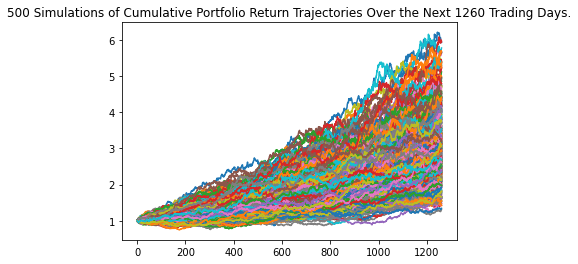

In [45]:
 # Plot simulation outcomes
line_plot_w5y = MC_w_tesla_5y.plot_simulation()

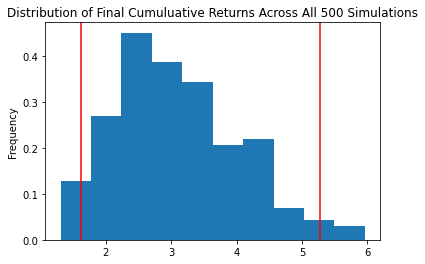

In [46]:
dist_plot_w5y = MC_w_tesla_5y.plot_distribution()

In [47]:
# Fetch summary statistics from the Monte Carlo simulation results
stocks_tbl_w5y = MC_w_tesla_5y.summarize_cumulative_return() 

# Print summary statistics
print(stocks_tbl_w5y)

count           500.000000
mean              3.099398
std               0.941566
min               1.311787
25%               2.397114
50%               2.990567
75%               3.717932
max               5.960597
95% CI Lower      1.620692
95% CI Upper      5.272731
Name: 1260, dtype: float64


In [48]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible 
#outcomes of our $10,000
ci_lower_w5y = round(stocks_tbl_w5y[8]*initial_investment,2)
ci_upper_w5y = round(stocks_tbl_w5y[9]*initial_investment,2)

# Print results
print(f"With an initial investment of ${initial_investment} in your portfolio you have a 95% " 
      f"chance it will be within in the range of ${ci_lower_w5y} and ${ci_upper_w5y} over the next 5 years")

With an initial investment of $10000 in your portfolio you have a 95% chance it will be within in the range of $16206.92 and $52727.31 over the next 5 years


In [49]:
# Configure a Monte Carlo simulation to forecast 10 years daily returns with TESLA stock
MC_w_tesla_10y = MCSimulation(
    portfolio_data = wtesla_portfolio,
    weights = [0.2, 0.2, 0.2, 0.2, 0.2],
    num_simulation = num_sims,
    num_trading_days = 252*10
)
MC_w_tesla_10y.portfolio_data.head()

AAPL                                                   BRK.B  \
              open    high      low   close    volume daily_return    open   
2015-01-02  111.39  111.44  107.350  109.30  47045497          NaN  151.50   
2015-01-05  108.29  108.65  105.410  106.25  50146623    -0.027905  148.81   
2015-01-06  106.56  107.43  104.630  106.23  59441540    -0.000188  147.64   
2015-01-07  107.20  108.20  106.695  107.75  34452408     0.014309  147.94   
2015-01-08  109.23  112.15  108.700  111.87  50255019     0.038237  150.60   

                                       ...      JNJ                   \
                high      low   close  ...      low   close   volume   
2015-01-02  151.6000  148.500  149.13  ...  104.130  104.49  4238082   
2015-01-05  149.0000  146.780  147.07  ...  103.682  103.85  6135505   
2015-01-06  148.5300  146.111  146.70  ...  102.940  103.25  6174712   
2015-01-07  149.1399  147.650  148.81  ...  103.810  105.56  6744677   
2015-01-08  151.3300  150.510  151.25  ...  105.750  106.38  7432752   

                           TSLA                                       \
           daily_return    open      high       low   close   volume   
2015-01-02          NaN  222.87  223.2500  213.2600  219.19  3943826   
2015-01-05    -0.006125  214.55  216.5000  207.1626  210.01  4577520   
2015-01-06    -0.005778  210.06  214.2000  204.2100  211.19  5383509   
2015-01-07     0.022373  213.35  214.7800  209.7800  210.81  2582044   
2015-01-08     0.007768  212.81  213.7999  210.0100  210.55  2922730   

                         
           daily_return  
2015-01-02          NaN  
2015-01-05    -0.041881  
2015-01-06     0.005619  
2015-01-07    -0.001799  
2015-01-08    -0.001233  

[5 rows x 30 columns]

In [50]:
MC_w_tesla_10y.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000887,1.002960,0.994138,1.009124,1.007343,1.002834,1.003294,1.008223,1.012325,1.009166,...,1.002423,0.999562,0.992989,1.002389,1.006683,1.011801,0.993039,1.005426,1.005149,0.993999
2,0.989034,1.018568,0.989733,1.011731,1.004605,0.995839,1.001067,1.013687,1.011775,1.009942,...,1.013490,0.985394,0.999311,0.991096,1.004090,1.015770,0.995606,1.001866,1.006999,0.989759
3,0.999784,1.023524,0.992203,1.011194,1.008805,1.005919,0.995448,1.017082,1.004898,1.023622,...,1.010345,0.987844,0.998956,0.991216,0.987693,1.011794,0.999325,0.998598,1.020438,0.990365
4,0.998426,1.031482,1.015807,1.002489,1.024497,1.002571,0.994541,1.009782,1.001978,1.025441,...,1.005731,0.999136,1.007881,0.991850,0.987737,1.011222,0.993086,0.988617,1.024527,0.980568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,8.664804,16.477505,5.088035,11.030442,10.989182,9.048976,10.586904,16.050450,4.376836,5.148716,...,5.788617,4.473135,8.629454,10.692905,3.682589,12.310304,15.212682,9.829604,8.235753,10.000640
2517,8.806897,16.207244,5.016419,10.986722,10.984074,9.098049,10.748753,16.031071,4.315564,5.169064,...,5.877465,4.515009,8.573023,10.704504,3.643159,12.362671,15.383522,9.984137,8.266920,10.105235
2518,8.913893,16.311112,5.063062,10.911373,10.825993,9.192763,10.645151,15.946414,4.367167,5.175545,...,5.892209,4.530999,8.540527,10.883313,3.633702,12.307498,15.425830,10.025286,8.309224,10.043149
2519,8.990766,16.278298,5.047416,10.949030,10.764267,9.195659,10.594247,15.528311,4.334421,5.120788,...,5.883121,4.550663,8.589352,10.974385,3.628332,12.202280,15.619266,10.059624,8.381500,10.152720


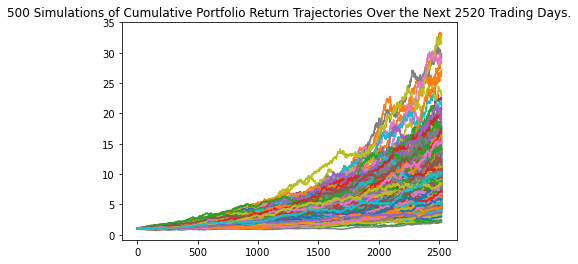

In [51]:
 # Plot simulation outcomes
line_plot_w10y = MC_w_tesla_10y.plot_simulation()

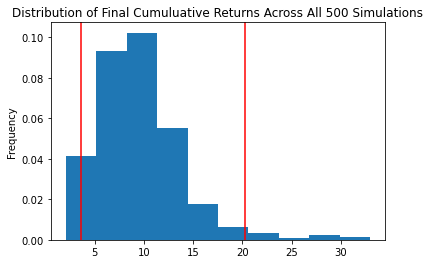

In [52]:
dist_plot_w10y = MC_w_tesla_10y.plot_distribution()

In [53]:
# Fetch summary statistics from the Monte Carlo simulation results
stocks_tbl_w10y = MC_w_tesla_10y.summarize_cumulative_return() 

# Print summary statistics
print(stocks_tbl_w10y)

count           500.000000
mean              9.607031
std               4.362744
min               2.077768
25%               6.544270
50%               9.144695
75%              11.460262
max              32.984234
95% CI Lower      3.645346
95% CI Upper     20.256560
Name: 2520, dtype: float64


In [54]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible 
#outcomes of our $10,000
ci_lower_w10y = round(stocks_tbl_w10y[8]*initial_investment,2)
ci_upper_w10y = round(stocks_tbl_w10y[9]*initial_investment,2)

# Print results
print(f"With an initial investment of ${initial_investment} in your portfolio you have a 95% " 
      f"chance it will be within in the range of ${ci_lower_w10y} and ${ci_upper_w10y} over the next 10 years")

With an initial investment of $10000 in your portfolio you have a 95% chance it will be within in the range of $36453.46 and $202565.6 over the next 10 years


In [55]:
# Configure a Monte Carlo simulation to forecast 20 years daily returns with TESLA stock
MC_w_tesla_20y = MCSimulation(
    portfolio_data = wtesla_portfolio,
    weights = [0.2, 0.2, 0.2, 0.2, 0.2],
    num_simulation = num_sims,
    num_trading_days = 252*20
)
MC_w_tesla_20y.portfolio_data.head()

AAPL                                                   BRK.B  \
              open    high      low   close    volume daily_return    open   
2015-01-02  111.39  111.44  107.350  109.30  47045497          NaN  151.50   
2015-01-05  108.29  108.65  105.410  106.25  50146623    -0.027905  148.81   
2015-01-06  106.56  107.43  104.630  106.23  59441540    -0.000188  147.64   
2015-01-07  107.20  108.20  106.695  107.75  34452408     0.014309  147.94   
2015-01-08  109.23  112.15  108.700  111.87  50255019     0.038237  150.60   

                                       ...      JNJ                   \
                high      low   close  ...      low   close   volume   
2015-01-02  151.6000  148.500  149.13  ...  104.130  104.49  4238082   
2015-01-05  149.0000  146.780  147.07  ...  103.682  103.85  6135505   
2015-01-06  148.5300  146.111  146.70  ...  102.940  103.25  6174712   
2015-01-07  149.1399  147.650  148.81  ...  103.810  105.56  6744677   
2015-01-08  151.3300  150.510  151.25  ...  105.750  106.38  7432752   

                           TSLA                                       \
           daily_return    open      high       low   close   volume   
2015-01-02          NaN  222.87  223.2500  213.2600  219.19  3943826   
2015-01-05    -0.006125  214.55  216.5000  207.1626  210.01  4577520   
2015-01-06    -0.005778  210.06  214.2000  204.2100  211.19  5383509   
2015-01-07     0.022373  213.35  214.7800  209.7800  210.81  2582044   
2015-01-08     0.007768  212.81  213.7999  210.0100  210.55  2922730   

                         
           daily_return  
2015-01-02          NaN  
2015-01-05    -0.041881  
2015-01-06     0.005619  
2015-01-07    -0.001799  
2015-01-08    -0.001233  

[5 rows x 30 columns]

In [56]:
MC_w_tesla_20y.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006983,1.016400,0.992012,1.010558,1.007587,1.009781,0.999540,1.002031,1.002164,1.014790,...,0.999163,1.002240,0.999563,1.001390,1.011473,1.008679,1.007092,0.991414,1.010459,1.020843
2,1.004642,1.018381,0.996416,1.015912,1.017826,1.008399,1.025825,1.017444,1.003055,1.015155,...,0.987908,0.997403,0.998365,1.007844,1.019726,0.997264,1.009890,0.983763,1.014181,1.018802
3,1.007957,1.005159,1.021267,1.022286,1.029420,1.011075,1.039452,1.021854,1.009962,1.007523,...,0.988602,0.998267,0.999316,0.999252,1.022103,0.997599,1.012997,0.988974,1.021218,1.022154
4,1.019813,0.998939,1.027584,1.029946,1.037442,0.988422,1.045381,1.022915,1.018901,1.014647,...,0.998656,0.985703,0.999772,0.996462,1.020115,0.988597,1.016860,0.986629,1.021869,1.034484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5036,170.651515,43.402544,42.758830,18.474928,90.437830,64.380898,79.608944,95.124015,65.163562,97.523820,...,56.676276,81.554134,36.456532,44.055292,68.299896,97.313820,129.483187,35.175501,26.827586,250.327679
5037,172.190862,43.320558,43.412583,18.656636,89.603369,63.926330,79.981356,95.398510,64.693838,97.379220,...,57.021485,82.518582,36.718617,44.164611,67.792794,98.498859,129.866008,35.794714,27.061535,251.647306
5038,171.949198,43.897531,43.983397,18.749808,90.037685,64.483273,78.553282,95.259767,64.770500,98.885190,...,56.366440,83.246631,36.826476,44.179878,68.152338,98.397810,130.428773,35.885283,27.381885,251.951277
5039,175.138339,43.009728,43.869765,18.741485,91.458288,63.544125,78.684728,95.871503,63.725674,98.849436,...,57.153655,83.357912,36.369597,44.309250,67.422604,99.702650,131.068217,35.945937,27.135333,252.366820


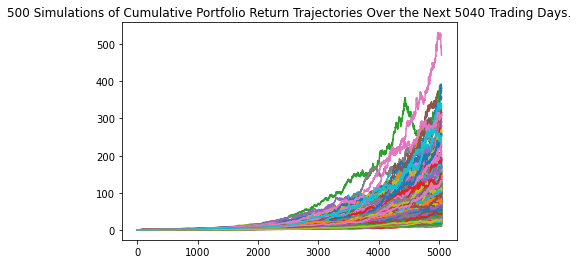

In [57]:
 # Plot simulation outcomes
line_plot_w20y = MC_w_tesla_20y.plot_simulation()

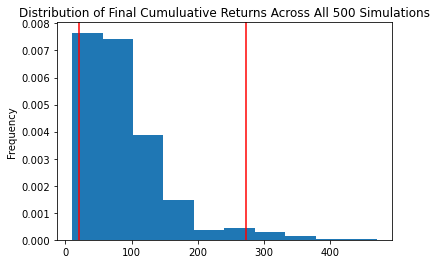

In [58]:
dist_plot_w20y = MC_w_tesla_20y.plot_distribution().get_figure().savefig('MCS_w_TESLA_20y.png')

In [59]:
# Fetch summary statistics from the Monte Carlo simulation results
stocks_tbl_w20y = MC_w_tesla_20y.summarize_cumulative_return() 

# Print summary statistics
print(stocks_tbl_w20y)

count           500.000000
mean             89.343944
std              63.931201
min              10.307045
25%              45.675487
50%              72.817657
75%             110.259904
max             469.991223
95% CI Lower     21.355886
95% CI Upper    273.272155
Name: 5040, dtype: float64


In [60]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible 
#outcomes of our $10,000
ci_lower_w20y = round(stocks_tbl_w20y[8]*initial_investment,2)
ci_upper_w20y = round(stocks_tbl_w20y[9]*initial_investment,2)

# Print results
print(f"With an initial investment of ${initial_investment} in your portfolio you have a 95% " 
      f"chance it will be within in the range of ${ci_lower_w20y} and ${ci_upper_w20y} over the next 20 years")

With an initial investment of $10000 in your portfolio you have a 95% chance it will be within in the range of $213558.86 and $2732721.55 over the next 20 years
